In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Iteration Time

In [127]:
file1 = "./iterationTime.dat"

def iterationTime(file): 

    df = pd.read_csv(file)
    df.columns = ['One']
    df['One'] = df['One'].astype('string')
    new = df['One'].str.split(' ', expand = True) 
    df['Time']= new[0].astype('float') 
    df['Iteration']= new[1].astype('float') 
    df['ExecutionTime']= new[2].astype('float') 
    df['Residual']= new[3].astype('float') 
    df.drop(columns =['One'], inplace = True) 

    return df

filepath1 = "withCoordinates/mesh100/plateHole"
file1_label = "Base Case (Mesh 100)"

filepath2 = "withCoordinates/mesh100/plateHole_ML"
file2_label = "With coordinate"

filepath3 = "withoutCoordinates/mesh100/plateHole_ML"
file3_label = "Without coordinates"

maxTimestep = 1

# Define iteration files

filepath1 = filepath1 + "/iterationTime.dat"
filepath2 = filepath2 + "/iterationTime.dat"
filepath3 = filepath3 + "/iterationTime.dat"

df_1 = iterationTime(filepath1)
df_2 = iterationTime(filepath2)
df_3 = iterationTime(filepath3)

/tmp/ipykernel_24942/3941720476.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


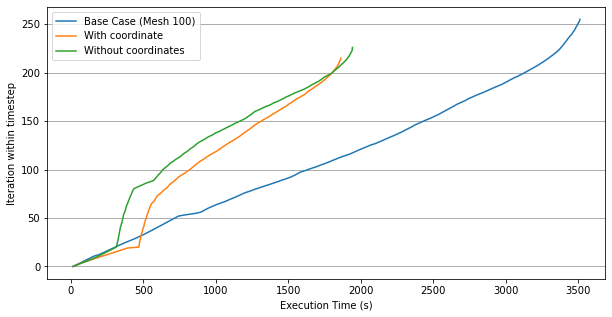

/tmp/ipykernel_24942/3941720476.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


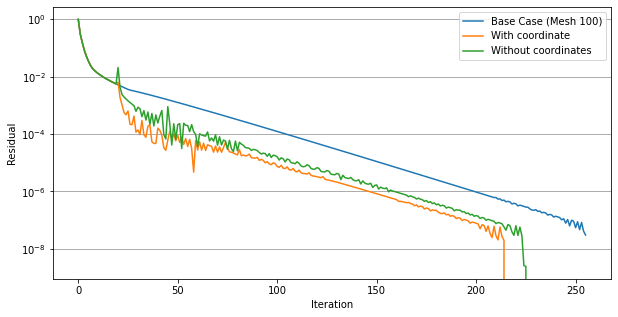

In [128]:
training_time = 2

ML_case_time2 = df_2["ExecutionTime"] + training_time + 2.3
ML_case_time3 = df_3["ExecutionTime"] + training_time + 2.4

plt.figure(figsize=(10,5))
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.plot(df_1["ExecutionTime"], df_1["Iteration"], label = file1_label) 
plt.plot(ML_case_time2, df_2["Iteration"],  label = file2_label) 
plt.plot(ML_case_time3, df_3["Iteration"],  label = file3_label) 

plt.xlabel("Execution Time (s)")
plt.ylabel("Iteration within timestep")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.plot(df_1["Iteration"], df_1["Residual"],  label = file1_label) 
plt.plot(df_2["Iteration"], df_2["Residual"],  label = file2_label) 
plt.plot(df_3["Iteration"], df_3["Residual"],  label = file3_label)

plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.legend()
plt.show()